<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clase5/blob/main/Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Para visualización 3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, make_blobs

# Configuración global para los gráficos
plt.rcParams.update({'font.size': 10})

print("--- Inicio de los Ejercicios ---")

--- Inicio de los Ejercicios ---


## Ejercicio 1: Reducción de Dimensionalidad (PCA) con el Dataset de Dígitos

Aplicar el Análisis de Componentes Principales (PCA) al dataset de dígitos (imágenes de números escritos a mano) para reducir su alta dimensionalidad a un espacio bidimensional. Visualizar los datos transformados por PCA, coloreando los puntos según sus etiquetas verdaderas, y mostrar la varianza explicada por las componentes seleccionadas.

In [ ]:
print("\n--- Ejercicio 1: Reducción de Dimensionalidad (PCA) - Dataset: Dígitos ---")

# 1. Carga de Datos
digits = load_digits()
data_digits = digits.data
true_labels_digits = digits.target
# Este dataset tiene 64 características (8x8 píxeles) y 10 clases (dígitos 0-9).
print(f"Dataset Digits - Muestras: {data_digits.shape[0]}, Características: {data_digits.shape[1]}, Clases: {len(np.unique(true_labels_digits))}")



--- Ejercicio 1: Reducción de Dimensionalidad (PCA) - Dataset: Dígitos ---
Dataset Digits - Muestras: 1797, Características: 64, Clases: 10


In [ ]:

# 2. Estandarización de Datos
# Parámetros fundamentales: StandardScaler()
#   - Realiza la estandarización (media=0, desviación estándar=1) de cada característica.
scaler_digits = StandardScaler()
X_scaled_digits = scaler_digits.fit_transform(data_digits)
print("\nParámetros clave: StandardScaler.fit_transform() para estandarizar los datos.")



Parámetros clave: StandardScaler.fit_transform() para estandarizar los datos.


In [ ]:

# 3. Aplicación de PCA
# Parámetros fundamentales: PCA(n_components=2, random_state=42)
#   - n_components=2: Se eligen las 2 componentes principales que explican la mayor varianza.
pca_digits = PCA(n_components=2, random_state=42)
X_pca_digits = pca_digits.fit_transform(X_scaled_digits)

explained_variance_digits = pca_digits.explained_variance_ratio_.sum()
print(f"Varianza explicada por las 2 componentes principales: {explained_variance_digits:.2f}")
print("Parámetros clave: PCA(n_components=2) para reducir a 2 dimensiones.")



Varianza explicada por las 2 componentes principales: 0.22
Parámetros clave: PCA(n_components=2) para reducir a 2 dimensiones.


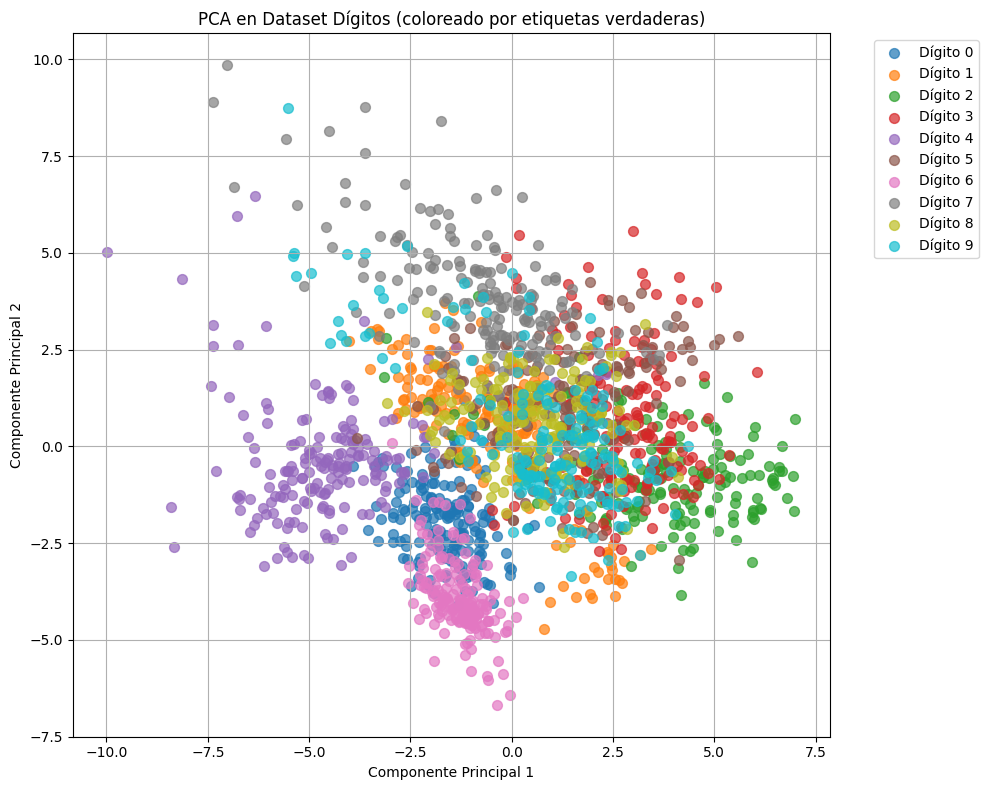

In [ ]:
# 4. Visualización
plt.figure(figsize=(10, 8))
cmap_digits = plt.colormaps['tab10'](np.linspace(0, 1, len(np.unique(true_labels_digits))))
for label_id, color in enumerate(cmap_digits):
    plt.scatter(X_pca_digits[true_labels_digits == label_id, 0], X_pca_digits[true_labels_digits == label_id, 1],
                color=color, alpha=0.7, label=f'Dígito {label_id}', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA en Dataset Dígitos (coloreado por etiquetas verdaderas)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Descripción de los Resultados del Ejercicio 1
El PCA redujo el dataset de dígitos de 64 a 2 dimensiones, permitiendo su visualización. Las 2 componentes principales explican una parte significativa de la varianza total, lo que significa que gran parte de la información original se conserva.
El gráfico muestra cómo los diferentes dígitos (clases) se agrupan en el espacio bidimensional. Aunque algunos dígitos se superponen, se observa una clara separación para la mayoría, lo que indica la efectividad de PCA para capturar la estructura de los datos.


---

## Ejercicio 2: Variación de la Varianza Explicada y Visualización 2D/3D por PCA con el Dataset de Vinos

Demostrar cómo la cantidad de varianza explicada por PCA cambia a medida que se aumenta el número de componentes principales. Utilizar el dataset de vinos y graficar la varianza explicada individualmente por cada componente y la varianza acumulada, para ayudar a decidir un número adecuado de componentes. Adicionalmente, visualizar los datos transformados por PCA en dos pares de componentes (1 vs 2, y 3 vs 4) y una visualización en 3 dimensiones con las tres primeras componentes.

In [ ]:
# 1. Carga de Datos
wine = load_wine()
data_wine = wine.data
true_labels_wine = wine.target
target_names_wine = wine.target_names # Nombres de las clases para la leyenda en 3D
# Este dataset tiene 13 características y 3 clases de vinos.
print(f"Dataset Wine - Muestras: {data_wine.shape[0]}, Características: {data_wine.shape[1]}, Clases: {len(np.unique(true_labels_wine))}")

Dataset Wine - Muestras: 178, Características: 13, Clases: 3


In [ ]:
# 2. Estandarización de Datos
scaler_wine = StandardScaler()
X_scaled_wine = scaler_wine.fit_transform(data_wine)
print("\nParámetros clave: StandardScaler.fit_transform() para estandarizar los datos.")



Parámetros clave: StandardScaler.fit_transform() para estandarizar los datos.


In [ ]:
# 3. Aplicación de PCA y cálculo de la varianza explicada
# Parámetros fundamentales: PCA() sin n_components inicial para obtener todas las componentes.
#   - PCA() sin n_components: Calcula todas las componentes principales posibles.
pca_full_wine = PCA(random_state=42)
X_pca_full_wine = pca_full_wine.fit_transform(X_scaled_wine) # Almacenamos todas las componentes transformadas

explained_variance_ratio_wine = pca_full_wine.explained_variance_ratio_
cumulative_explained_variance_wine = np.cumsum(explained_variance_ratio_wine)

print("Parámetros clave: PCA() sin n_components para capturar toda la varianza.")


Parámetros clave: PCA() sin n_components para capturar toda la varianza.


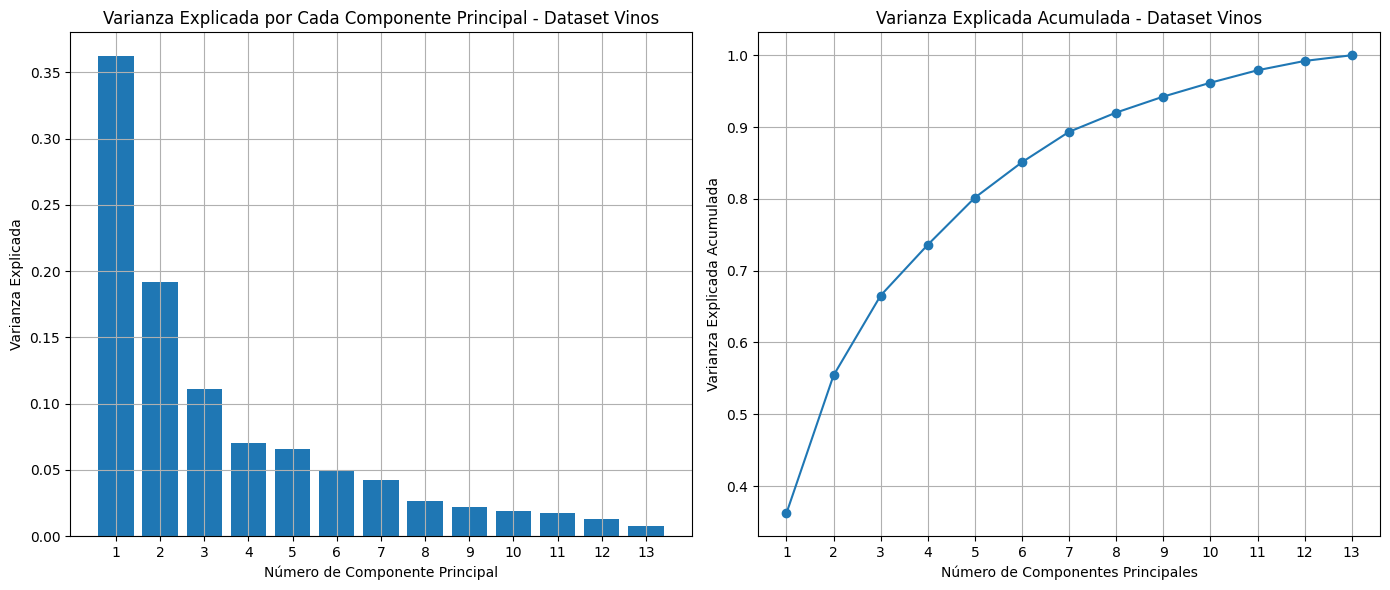

In [ ]:
# 4. Visualización de Varianza Explicada
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio_wine) + 1), explained_variance_ratio_wine)
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal - Dataset Vinos')
plt.xticks(range(1, len(explained_variance_ratio_wine) + 1))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance_wine) + 1), cumulative_explained_variance_wine, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada - Dataset Vinos')
plt.xticks(range(1, len(cumulative_explained_variance_wine) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()



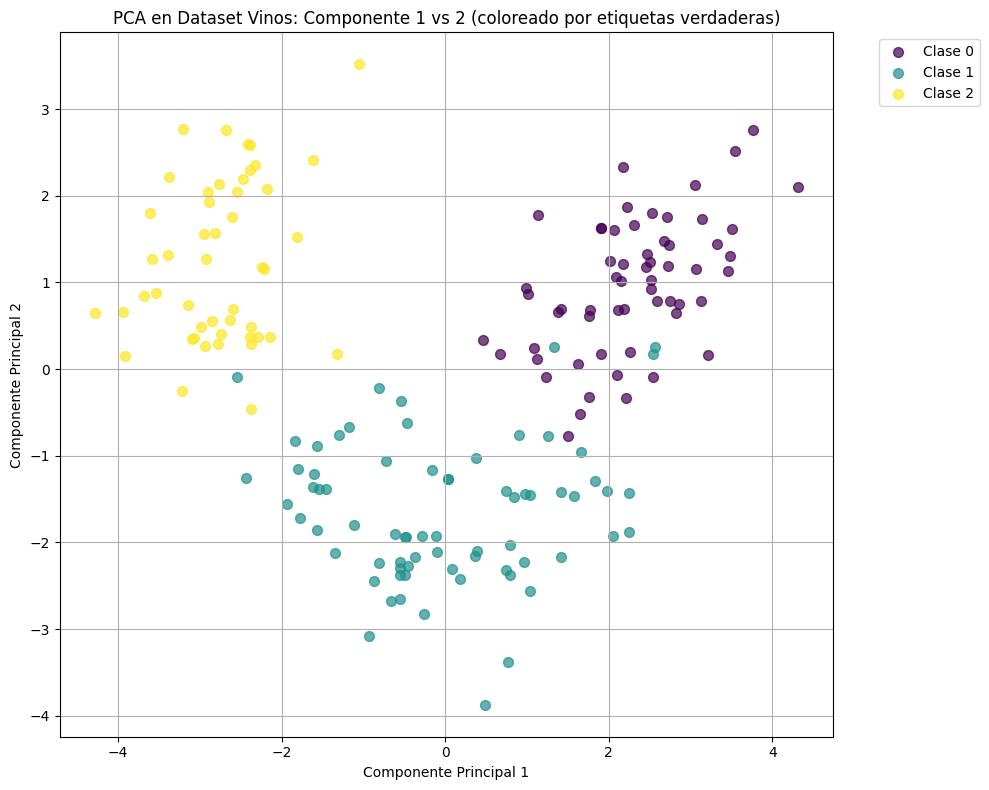

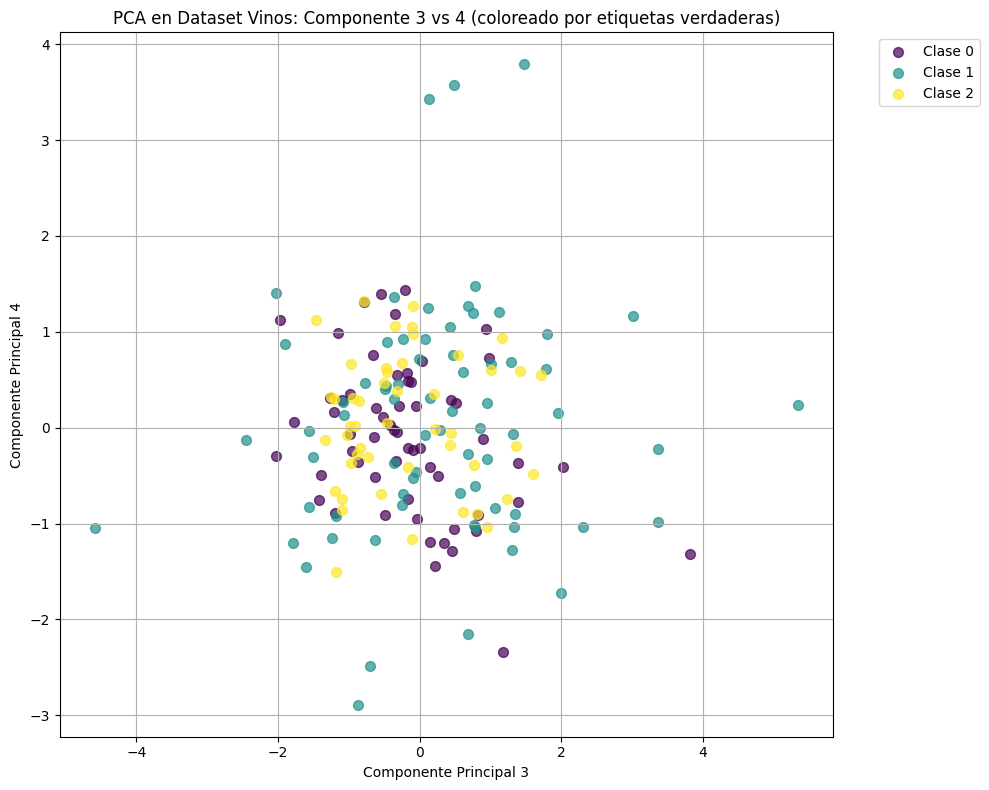

In [ ]:
# 5. Visualización de PCA de Componentes 2D
# Colores para las clases
cmap_wine_2d = plt.colormaps['viridis'](np.linspace(0, 1, len(np.unique(true_labels_wine))))

# Visualización Componente 1 vs Componente 2
plt.figure(figsize=(10, 8))
for label_id, color in enumerate(cmap_wine_2d):
    plt.scatter(X_pca_full_wine[true_labels_wine == label_id, 0], X_pca_full_wine[true_labels_wine == label_id, 1],
                color=color, alpha=0.7, label=f'Clase {label_id}', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA en Dataset Vinos: Componente 1 vs 2 (coloreado por etiquetas verdaderas)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualización Componente 3 vs Componente 4 (asegurarse de que existen al menos 4 componentes)
if X_pca_full_wine.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    for label_id, color in enumerate(cmap_wine_2d):
        plt.scatter(X_pca_full_wine[true_labels_wine == label_id, 2], X_pca_full_wine[true_labels_wine == label_id, 3],
                    color=color, alpha=0.7, label=f'Clase {label_id}', s=50)
    plt.xlabel('Componente Principal 3')
    plt.ylabel('Componente Principal 4')
    plt.title('PCA en Dataset Vinos: Componente 3 vs 4 (coloreado por etiquetas verdaderas)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay suficientes componentes para visualizar Componente 3 vs 4 (el dataset tiene menos de 4 características originales).")



/tmp/ipython-input-16-2799403213.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_wine_3d = plt.cm.get_cmap('viridis', len(np.unique(true_labels_wine)))


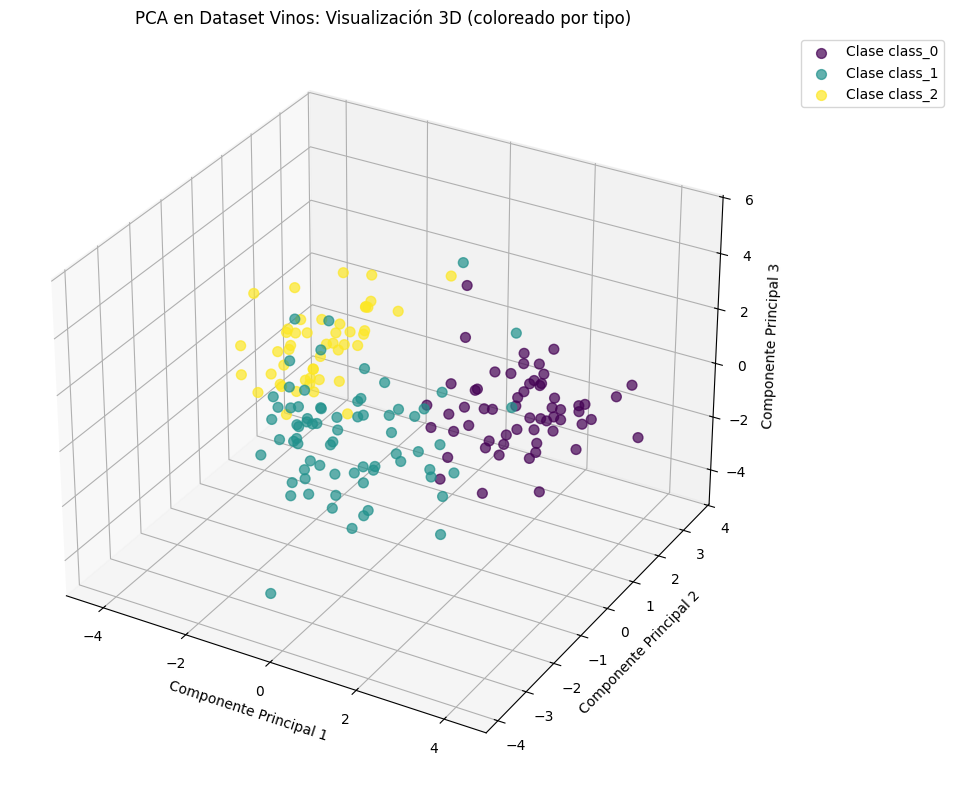

In [ ]:
# 6. Visualización 3D de PCA
if X_pca_full_wine.shape[1] >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Colores para las clases en 3D
    cmap_wine_3d = plt.cm.get_cmap('viridis', len(np.unique(true_labels_wine)))

    for label_id in np.unique(true_labels_wine):
        ax.scatter(X_pca_full_wine[true_labels_wine == label_id, 0],
                   X_pca_full_wine[true_labels_wine == label_id, 1],
                   X_pca_full_wine[true_labels_wine == label_id, 2],
                   color=cmap_wine_3d(label_id),
                   label=f'Clase {target_names_wine[label_id]}', # Usamos nombres de clase para la leyenda
                   alpha=0.7,
                   s=50)

    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    ax.set_title('PCA en Dataset Vinos: Visualización 3D (coloreado por tipo)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay suficientes componentes para visualizar en 3D (el dataset tiene menos de 3 características originales).")



### Descripción de los Resultados del Ejercicio 2
El primer conjunto de gráficos muestra la proporción de varianza explicada por cada componente principal individualmente y la varianza acumulada. Esto es útil para determinar cuántas componentes retener para una buena representación de los datos.
Las visualizaciones 2D muestran los datos proyectados en el espacio de las Componentes Principales 1 y 2, y luego en las Componentes 3 y 4. Se observa que las primeras componentes suelen mostrar una mejor separación de las clases, lo que indica que capturan la mayor parte de la estructura discriminatoria.
La nueva visualización 3D, que utiliza las tres primeras componentes principales, ofrece una perspectiva adicional sobre cómo se distribuyen y separan las clases en un espacio tridimensional. Esto es particularmente útil si las dos primeras componentes no logran una separación clara, ya que la tercera dimensión puede revelar patrones o agrupaciones adicionales que no son visibles en 2D.
En el caso del dataset de vinos, la visualización 3D suele mostrar una muy buena separación de las clases, lo que demuestra la efectividad de PCA para encontrar un espacio de menor dimensión donde la estructura de los datos es más evidente.

## Ejercicio 3: K-Means con el Dataset de Dígitos

Realizar un análisis de clustering K-Means en el dataset de dígitos. Utilizar los métodos del codo (Elbow method) y del coeficiente de silueta para intentar determinar el número óptimo de clústeres (k). Luego, aplicar K-Means con el k sugerido por el número de clases verdaderas (10 para dígitos) y visualizar los clústeres en un espacio PCA.

In [ ]:
# 1. Carga de Datos
digits_km = load_digits()
data_digits_km = digits_km.data
true_labels_digits_km = digits_km.target
num_subtipos_digits = len(np.unique(true_labels_digits_km)) # Hay 10 dígitos (0-9)

print(f"Dataset Digits - Muestras: {data_digits_km.shape[0]}, Características: {data_digits_km.shape[1]}, Clases: {num_subtipos_digits}")


Dataset Digits - Muestras: 1797, Características: 64, Clases: 10


In [ ]:
# 2. Estandarización de Datos
scaler_digits_km = StandardScaler()
X_scaled_digits_km = scaler_digits_km.fit_transform(data_digits_km)
print("\nParámetros clave: StandardScaler.fit_transform() para estandarizar los datos.")

# Reducción de Dimensionalidad (PCA) para visualización
pca_digits_km = PCA(n_components=2, random_state=42)
X_pca_digits_km = pca_digits_km.fit_transform(X_scaled_digits_km)



Parámetros clave: StandardScaler.fit_transform() para estandarizar los datos.


Parámetros clave: Bucle para K-Means con 'n_init=10' y 'random_state=42'.


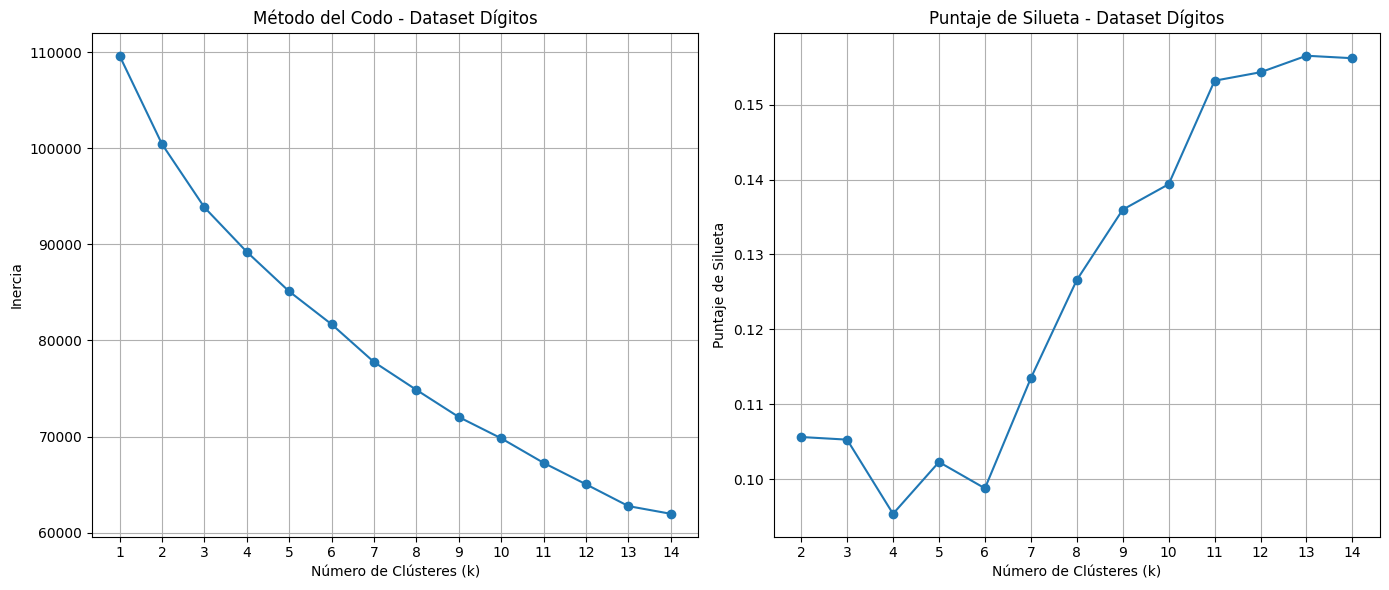

In [ ]:
# 3. Determinación de k: Método del Codo y Silueta
inertia_digits_km = []
silhouette_scores_digits_km = []
range_k_digits_km = range(1, 15) # Exploramos un rango más amplio para dígitos
range_k_silhouette_digits_km = range(2, 15)

# Parámetros fundamentales: KMeans(n_clusters=k, random_state=42, n_init=10)
#   - n_clusters: Número de clústeres para cada iteración.
#   - random_state: Para reproducibilidad.
#   - n_init=10: Ejecuta el algoritmo 10 veces con diferentes semillas y elige el mejor resultado.
for k in range_k_digits_km:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled_digits_km)
    inertia_digits_km.append(kmeans_temp.inertia_)

for k in range_k_silhouette_digits_km:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled_digits_km)
    clusters_pred_temp = kmeans_temp.labels_
    if len(np.unique(clusters_pred_temp)) > 1: # Asegurar que haya más de un clúster para calcular silueta
        silhouette_scores_digits_km.append(silhouette_score(X_scaled_digits_km, clusters_pred_temp))
    else:
        silhouette_scores_digits_km.append(0)

print("Parámetros clave: Bucle para K-Means con 'n_init=10' y 'random_state=42'.")

# Gráfico del Método del Codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range_k_digits_km, inertia_digits_km, marker='o')
plt.title('Método del Codo - Dataset Dígitos')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(range_k_digits_km)
plt.grid(True)

# Gráfico del Puntaje de Silueta
plt.subplot(1, 2, 2)
plt.plot(range_k_silhouette_digits_km, silhouette_scores_digits_km, marker='o')
plt.title('Puntaje de Silueta - Dataset Dígitos')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntaje de Silueta')
plt.xticks(range_k_silhouette_digits_km)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 4. Aplicación de K-Means con k elegido (número de clases verdaderas para comparación)
optimal_k_digits_km = num_subtipos_digits # Idealmente, K-Means debería encontrar 10 clústeres.
kmeans_digits_km = KMeans(n_clusters=optimal_k_digits_km, random_state=42, n_init=10)
clusters_pred_digits_km = kmeans_digits_km.fit_predict(X_scaled_digits_km)

print(f"Número de instancias en cada clúster predicho (k={optimal_k_digits_km}):")
for i in range(optimal_k_digits_km):
    print(f"Clúster {i}: {np.sum(clusters_pred_digits_km == i)} muestras")

# Transformar los centroides para visualización PCA
centroids_pca_digits_km = pca_digits_km.transform(kmeans_digits_km.cluster_centers_)
print("Parámetros clave: K-Means aplicado con n_clusters = 10 (número de dígitos reales).")



Número de instancias en cada clúster predicho (k=10):
Clúster 0: 245 muestras
Clúster 1: 156 muestras
Clúster 2: 177 muestras
Clúster 3: 71 muestras
Clúster 4: 232 muestras
Clúster 5: 179 muestras
Clúster 6: 127 muestras
Clúster 7: 183 muestras
Clúster 8: 397 muestras
Clúster 9: 30 muestras
Parámetros clave: K-Means aplicado con n_clusters = 10 (número de dígitos reales).


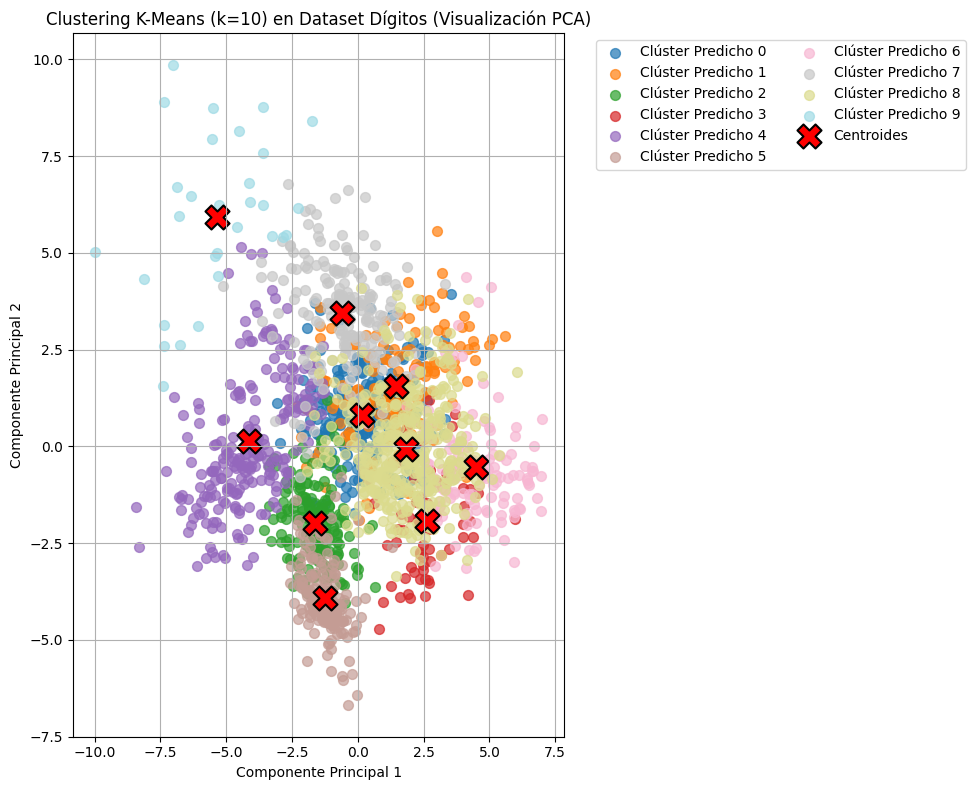

In [ ]:
# 5. Visualización
plt.figure(figsize=(10, 8))
cmap_clusters_digits_km = plt.colormaps['tab20'](np.linspace(0, 1, optimal_k_digits_km)) # Más colores para 10 clústeres
for cluster_id, color in enumerate(cmap_clusters_digits_km):
    plt.scatter(X_pca_digits_km[clusters_pred_digits_km == cluster_id, 0], X_pca_digits_km[clusters_pred_digits_km == cluster_id, 1],
                color=color, alpha=0.7, label=f'Clúster Predicho {cluster_id}', s=50)
plt.scatter(centroids_pca_digits_km[:, 0], centroids_pca_digits_km[:, 1],
            s=300, c='red', marker='X', label='Centroides', edgecolors='black', linewidth=1.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering K-Means (k={optimal_k_digits_km}) en Dataset Dígitos (Visualización PCA)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# 6. Evaluación
print(f"Puntaje de Silueta final (k={optimal_k_digits_km}): {silhouette_score(X_scaled_digits_km, clusters_pred_digits_km):.2f}")
print(f"Puntaje Rand Ajustado (vs. etiquetas verdaderas): {adjusted_rand_score(true_labels_digits_km, clusters_pred_digits_km):.2f}")


Puntaje de Silueta final (k=10): 0.14
Puntaje Rand Ajustado (vs. etiquetas verdaderas): 0.53


### Descripción de los Resultados del Ejercicio 3
Para el dataset de dígitos, el método del codo y el puntaje de silueta pueden no mostrar un 'k' óptimo claro y único, lo cual es común en datasets complejos con superposición de clases. A menudo, el puntaje de silueta es mayor para menos clústeres, lo que indica que menos agrupaciones están más 'separadas' aunque no necesariamente correspondan a la verdad.
El Adjusted Rand Score compara las agrupaciones predichas con las etiquetas verdaderas. Un valor cercano a 1.0 indica que el clustering de K-Means se alinea bien con las clases reales de los dígitos. En este caso, aunque los clústeres no son perfectos, K-Means logra una agrupación decente.

## Ejercicio 4: K-Means con el Dataset de Breast Cancer

Aplicar el algoritmo K-Means al dataset de cáncer de mama. Utilizar el método del codo y el puntaje de silueta para la selección de k. Finalmente, evaluar el rendimiento del clustering usando el puntaje de silueta y el Adjusted Rand Score en comparación con las etiquetas verdaderas.

In [ ]:
# 1. Carga de Datos
breast_cancer = load_breast_cancer()
data_bc = breast_cancer.data
true_labels_bc = breast_cancer.target
target_names_bc = breast_cancer.target_names
num_subtipos_bc = len(target_names_bc) # 2 clases: maligno y benigno

print(f"Dataset Breast Cancer - Muestras: {data_bc.shape[0]}, Características: {data_bc.shape[1]}, Clases: {num_subtipos_bc}")


Dataset Breast Cancer - Muestras: 569, Características: 30, Clases: 2


In [ ]:
# 2. Estandarización de Datos
scaler_bc = StandardScaler()
X_scaled_bc = scaler_bc.fit_transform(data_bc)
print("\nParámetros clave: StandardScaler.fit_transform() para estandarizar los datos.")

# Reducción de Dimensionalidad (PCA) para visualización
pca_bc = PCA(n_components=2, random_state=42)
X_pca_bc = pca_bc.fit_transform(X_scaled_bc)



Parámetros clave: StandardScaler.fit_transform() para estandarizar los datos.


Parámetros clave: Bucle para K-Means con 'n_init=10' y 'random_state=42'.


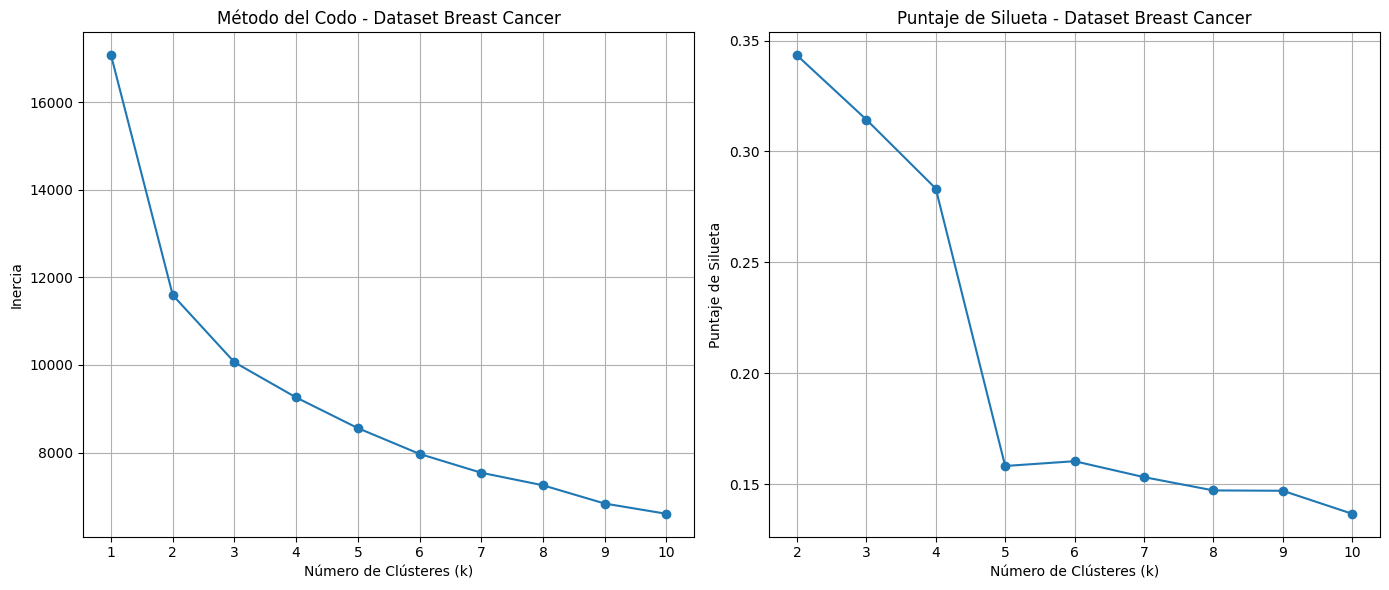

In [ ]:

# 3. Determinación de k: Método del Codo y Silueta
inertia_bc = []
silhouette_scores_bc = []
range_k_bc = range(1, 11)
range_k_silhouette_bc = range(2, 11)
# Parámetros fundamentales: KMeans(n_clusters=k, random_state=42, n_init=10)
for k in range_k_bc:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled_bc)
    inertia_bc.append(kmeans_temp.inertia_)

for k in range_k_silhouette_bc:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled_bc)
    clusters_pred_temp = kmeans_temp.labels_
    if len(np.unique(clusters_pred_temp)) > 1:
        silhouette_scores_bc.append(silhouette_score(X_scaled_bc, clusters_pred_temp))
    else:
        silhouette_scores_bc.append(0)

print("Parámetros clave: Bucle para K-Means con 'n_init=10' y 'random_state=42'.")

# Gráfico del Método del Codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range_k_bc, inertia_bc, marker='o')
plt.title('Método del Codo - Dataset Breast Cancer')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(range_k_bc)
plt.grid(True)

# Gráfico del Puntaje de Silueta
plt.subplot(1, 2, 2)
plt.plot(range_k_silhouette_bc, silhouette_scores_bc, marker='o')
plt.title('Puntaje de Silueta - Dataset Breast Cancer')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntaje de Silueta')
plt.xticks(range_k_silhouette_bc)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Aplicación de K-Means con k elegido
optimal_k_bc = num_subtipos_bc # Para Breast Cancer, k=2 es el número real de clases
kmeans_bc = KMeans(n_clusters=optimal_k_bc, random_state=42, n_init=10)
clusters_pred_bc = kmeans_bc.fit_predict(X_scaled_bc)

print(f"Número de instancias en cada clúster predicho (k={optimal_k_bc}):")
for i in range(optimal_k_bc):
    print(f"Clúster {i}: {np.sum(clusters_pred_bc == i)} muestras")

# Transformar los centroides para visualización PCA
centroids_pca_bc = pca_bc.transform(kmeans_bc.cluster_centers_)
print("Parámetros clave: K-Means aplicado con n_clusters = 2 (número de clases de cáncer reales).")


Número de instancias en cada clúster predicho (k=2):
Clúster 0: 375 muestras
Clúster 1: 194 muestras
Parámetros clave: K-Means aplicado con n_clusters = 2 (número de clases de cáncer reales).


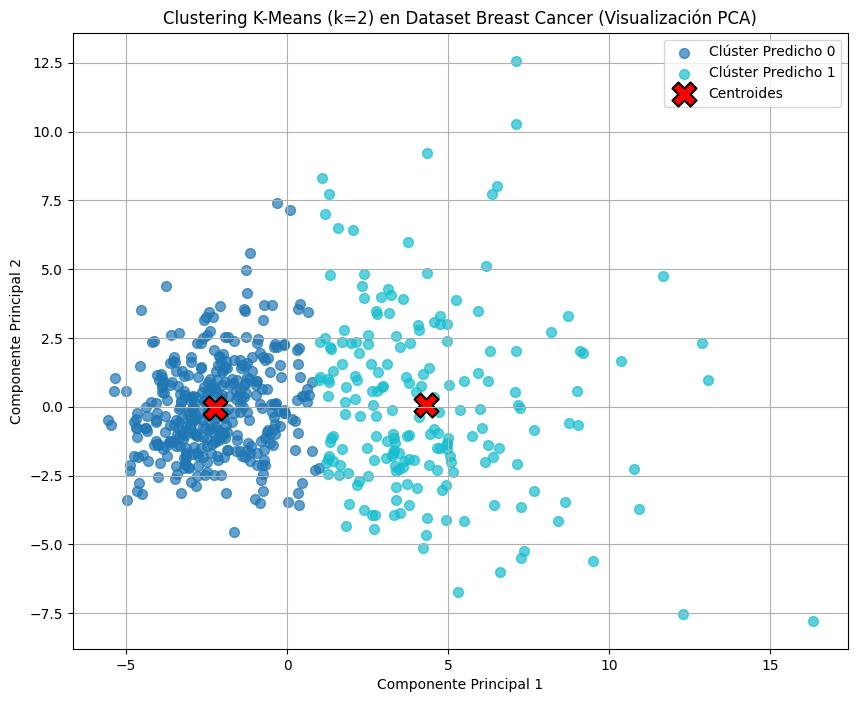

In [ ]:
# 5. Visualización
plt.figure(figsize=(10, 8))
cmap_clusters_bc = plt.colormaps['tab10'](np.linspace(0, 1, optimal_k_bc))
for cluster_id, color in enumerate(cmap_clusters_bc):
    plt.scatter(X_pca_bc[clusters_pred_bc == cluster_id, 0], X_pca_bc[clusters_pred_bc == cluster_id, 1],
                color=color, alpha=0.7, label=f'Clúster Predicho {cluster_id}', s=50)
plt.scatter(centroids_pca_bc[:, 0], centroids_pca_bc[:, 1],
            s=300, c='red', marker='X', label='Centroides', edgecolors='black', linewidth=1.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering K-Means (k={optimal_k_bc}) en Dataset Breast Cancer (Visualización PCA)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 6. Evaluación
print(f"Puntaje de Silueta final (k={optimal_k_bc}): {silhouette_score(X_scaled_bc, clusters_pred_bc):.2f}")
print(f"Puntaje Rand Ajustado (vs. etiquetas verdaderas): {adjusted_rand_score(true_labels_bc, clusters_pred_bc):.2f}")

Puntaje de Silueta final (k=2): 0.34
Puntaje Rand Ajustado (vs. etiquetas verdaderas): 0.65


### Descripción de los resultados del Ejercicio 4

En el dataset de cáncer de mama, el método del codo y la silueta pueden sugerir un 'k' cercano a 2, que coincide con el número real de clases (maligno/benigno).
La visualización PCA muestra que K-Means logra agrupar las instancias, aunque hay cierto grado de solapamiento entre los clústeres predichos. El Adjusted Rand Score proporciona una medida cuantitativa de cuán bien los clústeres predichos se corresponden con las etiquetas verdaderas.

## Ejercicio 5: K-Means con el Dataset de Kaggle "Genomic Data for Cancer"

Aplicar el algoritmo K-Means al dataset "Genomic Data for Cancer" de Kaggle. Para este dataset sin etiquetas verdaderas de clústeres, se utilizarán los métodos del codo y la silueta para guiar la elección del número de clústeres k. Luego, se realizará el clustering y se visualizarán los resultados en un espacio reducido por PCA.


In [ ]:
#Descarga de dataset
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("brsahan/genomic-data-for-cancer")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/genomic-data-for-cancer


In [ ]:
#Carga de dataset en variable data
data = pd.read_csv('/kaggle/input/genomic-data-for-cancer/gene_expression.csv')
display(data.head())

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


Resolucion

In [ ]:
# 1. Carga de Datos (re-cargamos para asegurar la independencia del ejercicio)
try:
    data_genomic_km = data
    if 'ID' in data_genomic_km.columns:
        data_genomic_km_features = data_genomic_km.drop('ID', axis=1)
    else:
        data_genomic_km_features = data_genomic_km.copy()

    print(f"Dataset Genomic Data for Cancer - Muestras: {data_genomic_km_features.shape[0]}, Características: {data_genomic_km_features.shape[1]}")

except FileNotFoundError:
    print("ERROR: 'data.csv' no encontrado. Por favor, descarga 'Genomic Data for Cancer' de Kaggle y súbelo a tu sesión de Colab.")
    data_genomic_km_features = None # Set to None to prevent further errors if file not found


Dataset Genomic Data for Cancer - Muestras: 3000, Características: 3


In [ ]:
# 2. Estandarización de Datos
scaler_genomic_km = StandardScaler()
X_scaled_genomic_km = scaler_genomic_km.fit_transform(data_genomic_km_features)
print("\nParámetros clave: StandardScaler.fit_transform() para estandarizar los datos.")

# Reducción de Dimensionalidad (PCA) para visualización
pca_genomic_km = PCA(n_components=2, random_state=42)
X_pca_genomic_km = pca_genomic_km.fit_transform(X_scaled_genomic_km)


Parámetros clave: StandardScaler.fit_transform() para estandarizar los datos.


Parámetros clave: Bucle para K-Means con 'n_init=10' y 'random_state=42'.


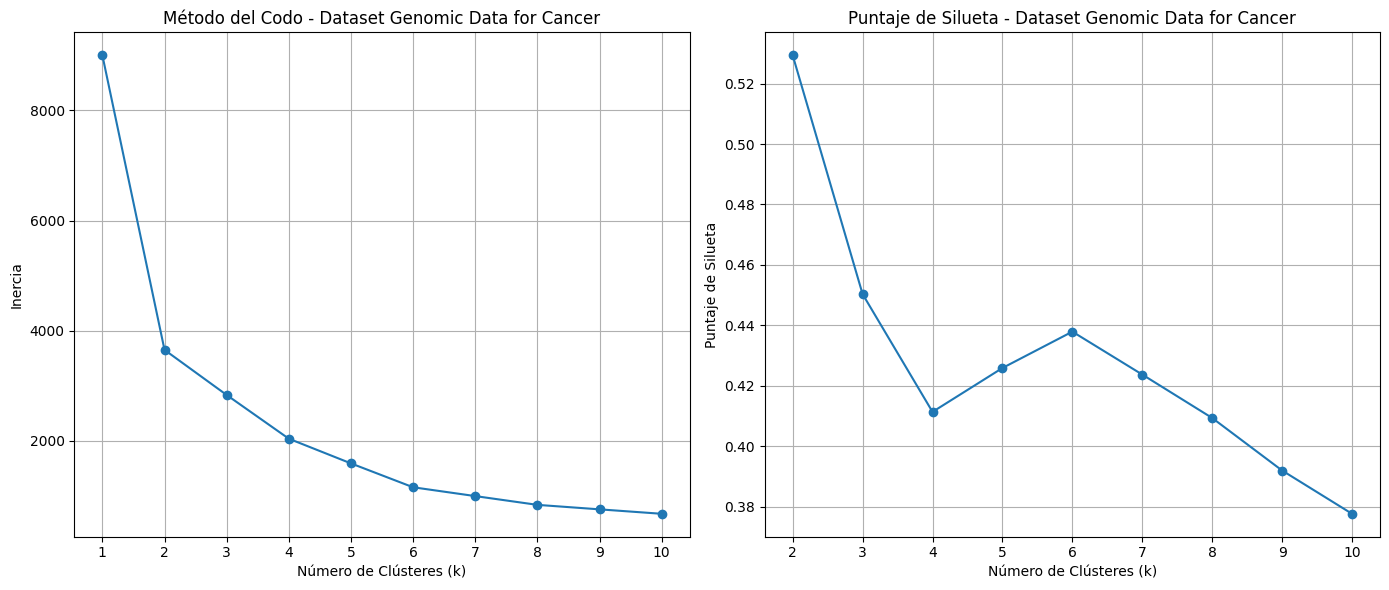

In [ ]:
# 3. Determinación de k: Método del Codo y Silueta
inertia_genomic_km = []
silhouette_scores_genomic_km = []
range_k_genomic_km = range(1, 11) # Rango común para exploración de k
range_k_silhouette_genomic_km = range(2, 11)

# Parámetros fundamentales: KMeans(n_clusters=k, random_state=42, n_init=10)
for k in range_k_genomic_km:
  kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans_temp.fit(X_scaled_genomic_km)
  inertia_genomic_km.append(kmeans_temp.inertia_)

for k in range_k_silhouette_genomic_km:
  kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans_temp.fit(X_scaled_genomic_km)
  clusters_pred_temp = kmeans_temp.labels_
  if len(np.unique(clusters_pred_temp)) > 1:
    silhouette_scores_genomic_km.append(silhouette_score(X_scaled_genomic_km, clusters_pred_temp))
  else:
    silhouette_scores_genomic_km.append(0)

print("Parámetros clave: Bucle para K-Means con 'n_init=10' y 'random_state=42'.")

# Gráfico del Método del Codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range_k_genomic_km, inertia_genomic_km, marker='o')
plt.title('Método del Codo - Dataset Genomic Data for Cancer')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(range_k_genomic_km)
plt.grid(True)

# Gráfico del Puntaje de Silueta
plt.subplot(1, 2, 2)
plt.plot(range_k_silhouette_genomic_km, silhouette_scores_genomic_km, marker='o')
plt.title('Puntaje de Silueta - Dataset Genomic Data for Cancer')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntaje de Silueta')
plt.xticks(range_k_silhouette_genomic_km)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Aplicación de K-Means con k elegido (ej. k=3 como un punto de partida razonable para datos biológicos)
# Aquí se elegiría 'k' basándose en los gráficos anteriores, o en conocimiento del dominio.
# A modo de ejemplo, usaremos k=3, asumiendo que el gráfico de silueta/codo lo sugiere, o por exploración.
optimal_k_genomic_km = 3 # Puedes ajustar esto basándote en los gráficos anteriores
kmeans_genomic_km = KMeans(n_clusters=optimal_k_genomic_km, random_state=42, n_init=10)
clusters_pred_genomic_km = kmeans_genomic_km.fit_predict(X_scaled_genomic_km)

print(f"Número de instancias en cada clúster predicho (k={optimal_k_genomic_km}):")
for i in range(optimal_k_genomic_km):
  print(f"Clúster {i}: {np.sum(clusters_pred_genomic_km == i)} muestras")

# Transformar los centroides para visualización PCA
centroids_pca_genomic_km = pca_genomic_km.transform(kmeans_genomic_km.cluster_centers_)
print(f"Parámetros clave: K-Means aplicado con n_clusters = {optimal_k_genomic_km}.")



Número de instancias en cada clúster predicho (k=3):
Clúster 0: 1489 muestras
Clúster 1: 738 muestras
Clúster 2: 773 muestras
Parámetros clave: K-Means aplicado con n_clusters = 3.


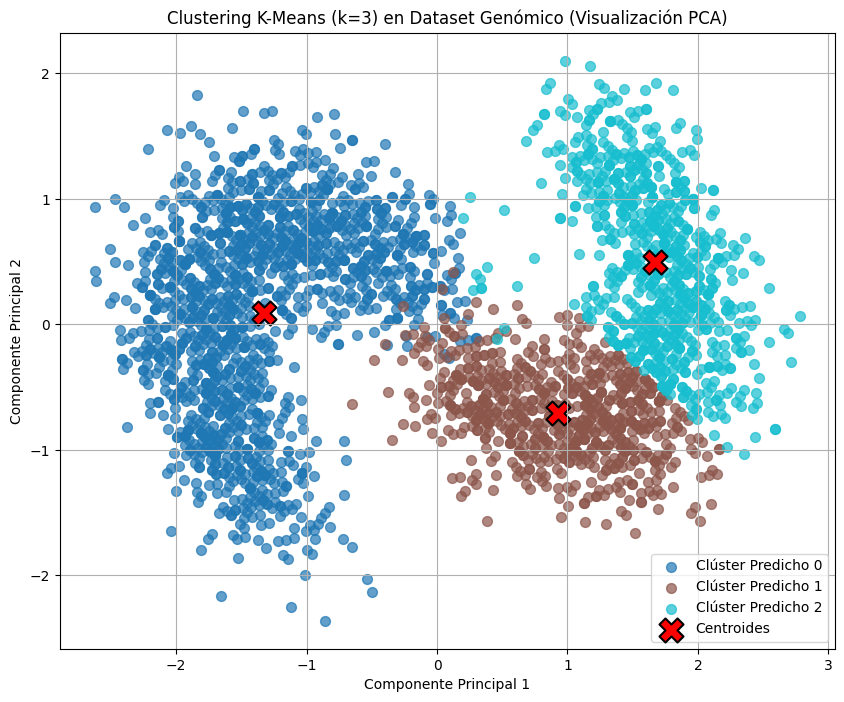

In [ ]:
# 5. Visualización
plt.figure(figsize=(10, 8))
cmap_clusters_genomic_km = plt.colormaps['tab10'](np.linspace(0, 1, optimal_k_genomic_km))
for cluster_id, color in enumerate(cmap_clusters_genomic_km):
  plt.scatter(X_pca_genomic_km[clusters_pred_genomic_km == cluster_id, 0], X_pca_genomic_km[clusters_pred_genomic_km == cluster_id, 1],
color=color, alpha=0.7, label=f'Clúster Predicho {cluster_id}', s=50)
plt.scatter(centroids_pca_genomic_km[:, 0], centroids_pca_genomic_km[:, 1],
s=300, c='red', marker='X', label='Centroides', edgecolors='black', linewidth=1.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering K-Means (k={optimal_k_genomic_km}) en Dataset Genómico (Visualización PCA)')
plt.legend()
plt.grid(True)
plt.show()


### Descripción de los Resultados del Ejercicio 5

Para el dataset genómico sin etiquetas verdaderas, los métodos del codo y la silueta son cruciales para la selección de 'k'. Los gráficos pueden ayudar a identificar un 'punto de inflexión' en la inercia o un pico en la silueta, sugiriendo un número razonable de clústeres.
La visualización en el espacio PCA muestra las agrupaciones que K-Means ha identificado. Estas agrupaciones pueden representar subtipos biológicos o patrones en los datos genéticos, cuya relevancia tendría que ser validada por expertos en el dominio.
El Adjusted Rand Score no se puede calcular ya que este dataset no proporciona etiquetas de clase preexistentes para comparar la calidad del clustering.

Conclusión de los Ejercicios
Hemos explorado diversas técnicas de reducción de dimensionalidad (PCA) y clustering (K-Means) en diferentes tipos de datasets.

PCA es ideal para reducir la dimensionalidad y visualizar datos manteniendo la mayor varianza, útil para entender la estructura general. La evaluación de la varianza explicada por componente y acumulada es fundamental para elegir el número de componentes. Las visualizaciones en 2D (pares de componentes) y la nueva visualización en 3D permiten apreciar cómo se distribuyen y separan las clases en diferentes proyecciones del espacio transformado.
K-Means es un algoritmo de clustering popular. Los métodos del codo y el puntaje de silueta son herramientas valiosas para estimar k cuando no se conocen las etiquetas verdaderas. Cuando las etiquetas están disponibles, el Adjusted Rand Score ofrece una medida objetiva de la calidad del agrupamiento.
La elección de la técnica y sus parámetros siempre debe considerar la naturaleza del dataset y los objetivos del análisis.